In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Academics/WHO-COVID-19-global-data.csv",
                 parse_dates=["Date_reported"])
df.rename(columns={'Date_reported': 'date', 
                   ' Country_code': 'country_code', 
                   ' Country': 'country', ' WHO_region': 'WHO_region', 
                   ' New_cases': 'new_cases', 
                   ' Cumulative_cases': 'cumulative_cases', 
                   ' New_deaths': 'new_deaths', 
                   ' Cumulative_deaths': 'cumulative_deaths'}, 
          inplace=True)
df.head()

,date,country_code,country,WHO_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


In [ ]:
df = df[df.country == "India"]
df.head()

,date,country_code,country,WHO_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
17276,2020-01-30,IN,India,SEARO,5,5,0,0
17277,2020-01-31,IN,India,SEARO,0,5,0,0
17278,2020-02-01,IN,India,SEARO,0,5,0,0
17279,2020-02-02,IN,India,SEARO,1,6,0,0
17280,2020-02-03,IN,India,SEARO,1,7,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 17276 to 17499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               224 non-null    datetime64[ns]
 1   country_code       224 non-null    object        
 2   country            224 non-null    object        
 3   WHO_region         224 non-null    object        
 4   new_cases          224 non-null    int64         
 5   cumulative_cases   224 non-null    int64         
 6   new_deaths         224 non-null    int64         
 7   cumulative_deaths  224 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 15.8+ KB


In [ ]:
df.isna().sum()

date                 0
country_code         0
country              0
WHO_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

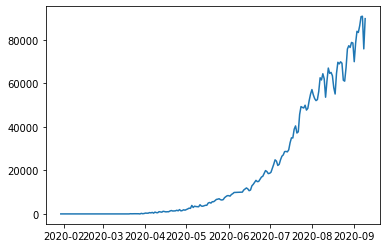

In [ ]:
fig, ax = plt.subplots()
ax.plot(df.date, df.new_cases);

In [ ]:
df.sort_values(by=["date"], inplace=True)
df.head()

,date,country_code,country,WHO_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
17276,2020-01-30,IN,India,SEARO,5,5,0,0
17277,2020-01-31,IN,India,SEARO,0,5,0,0
17278,2020-02-01,IN,India,SEARO,0,5,0,0
17279,2020-02-02,IN,India,SEARO,1,6,0,0
17280,2020-02-03,IN,India,SEARO,1,7,0,0


In [ ]:
df_tmp = df.copy()

In [ ]:
# Enriching our DataFrame by datetime attributes

df_tmp["Year"] = df_tmp.date.dt.year
df_tmp["Month"] = df_tmp.date.dt.month
df_tmp["Date"] = df_tmp.date.dt.day
# df_tmp["DayOfWeek"] = df_tmp.date.dt.dayofweek
# df_tmp["DayOfYear"] = df_tmp.date.dt.dayofyear

In [ ]:
df_tmp.head()

,date,country_code,country,WHO_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,Year,Month,Date
17276,2020-01-30,IN,India,SEARO,5,5,0,0,2020,1,30
17277,2020-01-31,IN,India,SEARO,0,5,0,0,2020,1,31
17278,2020-02-01,IN,India,SEARO,0,5,0,0,2020,2,1
17279,2020-02-02,IN,India,SEARO,1,6,0,0,2020,2,2
17280,2020-02-03,IN,India,SEARO,1,7,0,0,2020,2,3


In [ ]:
# iso_code, continent, location will be the same through out the data...we can drop them.
df_tmp.drop(["country_code", "country", "WHO_region"], axis=1, inplace=True)

In [ ]:
# Find the columns which contains strings

for label, country in df_tmp.items():
    if pd.api.types.is_string_dtype(country):
        df_tmp[label] = country.astype("category").cat.as_ordered()

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 17276 to 17499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               224 non-null    datetime64[ns]
 1   new_cases          224 non-null    int64         
 2   cumulative_cases   224 non-null    int64         
 3   new_deaths         224 non-null    int64         
 4   cumulative_deaths  224 non-null    int64         
 5   Year               224 non-null    int64         
 6   Month              224 non-null    int64         
 7   Date               224 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 15.8 KB


# Filling missing values

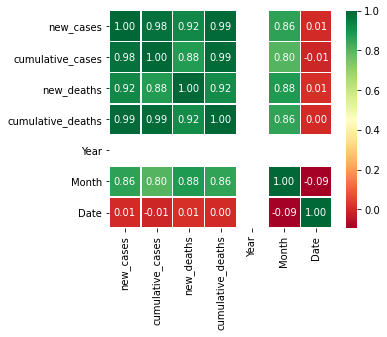

In [ ]:
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");

In [ ]:
df_tmp.isna().sum()

date                 0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
Year                 0
Month                0
Date                 0
dtype: int64

In [ ]:
df_tmp.head()

,date,new_cases,cumulative_cases,new_deaths,cumulative_deaths,Year,Month,Date
17276,2020-01-30,5,5,0,0,2020,1,30
17277,2020-01-31,0,5,0,0,2020,1,31
17278,2020-02-01,0,5,0,0,2020,2,1
17279,2020-02-02,1,6,0,0,2020,2,2
17280,2020-02-03,1,7,0,0,2020,2,3


In [ ]:
from sklearn.model_selection import train_test_split

X = df_tmp.drop(["new_cases", "date", "cumulative_cases", "new_deaths", "cumulative_deaths"], axis=1)
y = df_tmp.new_cases

x = df_tmp.drop(["new_cases", "cumulative_cases", "new_deaths", "cumulative_deaths"], axis=1)
x_train = x[x.date < np.datetime64("2020-07-27")]
x_test = x[x.date >= np.datetime64("2020-07-27")]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error


def rmse(y_true, y_preds):
    return np.sqrt(mean_squared_error(y_true, y_preds))

def rmsle(y_true, y_preds):
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

def show_scores(model):
    test_preds = model.predict(X_test)
    
    scores = {
        "Test MAE": mean_absolute_error(y_test, test_preds),
        "Test RMSLE": rmsle(y_test, test_preds),
        "Test RMSE": rmse(y_test, test_preds),
    }
    return scores

# Modelling

## 1. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=69)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=69, verbose=0, warm_start=False)

In [ ]:
score1 = model.score(X_test, y_test)
score1

-8.956360672682981

In [ ]:
y_preds = model.predict(X_test)
y_preds[:10]

array([48299.42, 48299.42, 48299.42, 48299.42, 48299.42, 19694.85,
       19848.3 , 20922.47, 22544.41, 24194.05])

In [ ]:
rfr_scores = show_scores(model)
rfr_scores

{'Test MAE': 33062.931777777776,
 'Test RMSE': 37364.279597422785,
 'Test RMSLE': 0.8319113031755988}

In [ ]:
# # using GridSearchCV
# from sklearn.model_selection import GridSearchCV

# gs_grid = {
#     "n_estimators": np.arange(10, 100, 10),
#     "max_depth": [None, 3, 5, 10],
#     "min_samples_split": np.arange(2, 10, 2),
#     "min_samples_leaf": np.arange(1, 10 ,2),
#     "max_features": [0.5, 1, "auto", "sqrt"]
# }

# gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1,
#                                               random_state=69),
#                         param_grid=gs_grid,
#                         cv=5,
#                         verbose=True)

# gs_model.fit(X_train, y_train)

## 2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(69)

model2 = LinearRegression().fit(X_train, y_train)

In [ ]:
score2 = model2.score(X_test, y_test)
score2

-10.258940018555633

In [ ]:
lr_scores = show_scores(model2)
lr_scores

{'Test MAE': 38493.393612595115,
 'Test RMSE': 39733.33836056726,
 'Test RMSLE': 0.8629739338848748}

## 3. Support Vector Regression (SVR)

- Return the coefficient of determination R^2 of the prediction.
- The best possible score is 1.0 and **it can be negative (because the model can be arbitrarily worse)**. A constant model that *always predicts the expected value of y*, disregarding the input features, would get a **R^2 score of 0.0**.

In [ ]:
from sklearn.svm import SVR

np.random.seed(69)

model3 = SVR().fit(X_train, y_train)

In [ ]:
score3 = model3.score(X_test, y_test)
score3

-29.76739678511015

In [ ]:
svr_scores = show_scores(model3)
svr_scores

{'Test MAE': 64606.5769214388,
 'Test RMSE': 65682.80317344813,
 'Test RMSLE': 3.6414722836300935}

## 4. AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model4 = AdaBoostRegressor(random_state=69).fit(X_train, y_train)

In [ ]:
score4 = model4.score(X_test, y_test)
score4

-8.943841797126655

In [ ]:
adaboost_scores = show_scores(model4)
adaboost_scores

{'Test MAE': 33085.94253149389,
 'Test RMSE': 37340.781759636884,
 'Test RMSLE': 0.8273075033264329}

## 5. XGBoost

In [ ]:
from xgboost import XGBRegressor

np.random.seed(69)

model5 = XGBRegressor().fit(X_train, y_train)
score5 = model5.score(X_test, y_test)
score5

[11:54:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-8.908481719126634

In [ ]:
xgboost_scores = show_scores(model5)
xgboost_scores

{'Test MAE': 32900.021484375,
 'Test RMSE': 37274.33114234199,
 'Test RMSLE': 0.831691494771399}

## Polynomial Regression

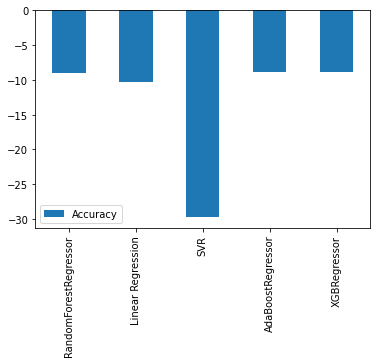

In [ ]:
model_scores = {
    "RandomForestRegressor": score1,
    "Linear Regression": score2,
    "SVR": score3,
    "AdaBoostRegressor": score4,
    "XGBRegressor": score5
}

model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot(kind="bar");

In [ ]:
scores_all = [rfr_scores, lr_scores, svr_scores, adaboost_scores, xgboost_scores]
scores_all

[{'Test MAE': 33062.931777777776,
  'Test RMSE': 37364.279597422785,
  'Test RMSLE': 0.8319113031755988},
 {'Test MAE': 38493.393612595115,
  'Test RMSE': 39733.33836056726,
  'Test RMSLE': 0.8629739338848748},
 {'Test MAE': 64606.5769214388,
  'Test RMSE': 65682.80317344813,
  'Test RMSLE': 3.6414722836300935},
 {'Test MAE': 33085.94253149389,
  'Test RMSE': 37340.781759636884,
  'Test RMSLE': 0.8273075033264329},
 {'Test MAE': 32900.021484375,
  'Test RMSE': 37274.33114234199,
  'Test RMSLE': 0.831691494771399}]

In [ ]:
all_scores = [[i[j] for j in ["Test MAE", "Test RMSE", "Test RMSLE"]] for i in scores_all]
val_scores_df = pd.DataFrame(all_scores,
                             index=["RandomForestRegressor scores", "LinearRegression scores", "SVR scores", "AdaBoost scores", "XGBRegressor scores"],
                             columns=["Test MAE", "Test RMSE", "Test RMSLE"])
val_scores_df

,Test MAE,Test RMSE,Test RMSLE
RandomForestRegressor scores,33062.931778,37364.279597,0.831911
LinearRegression scores,38493.393613,39733.338361,0.862974
SVR scores,64606.576921,65682.803173,3.641472
AdaBoost scores,33085.942531,37340.781760,0.827308
XGBRegressor scores,32900.021484,37274.331142,0.831691


In [ ]:
val_scores_df_T = val_scores_df.T
val_scores_df_T

,RandomForestRegressor scores,LinearRegression scores,SVR scores,AdaBoost scores,XGBRegressor scores
Test MAE,33062.931778,38493.393613,64606.576921,33085.942531,32900.021484
Test RMSE,37364.279597,39733.338361,65682.803173,37340.781760,37274.331142
Test RMSLE,0.831911,0.862974,3.641472,0.827308,0.831691


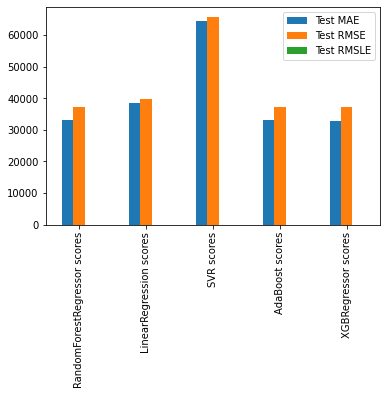

In [ ]:
val_scores_df.plot.bar();

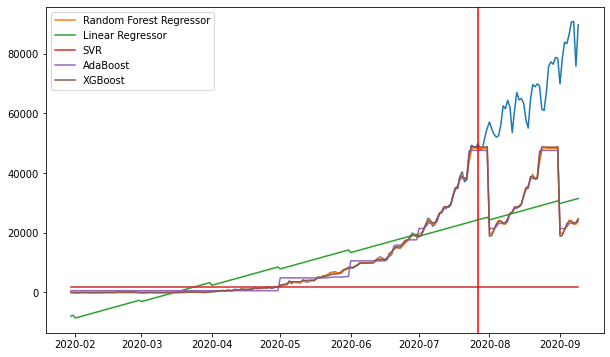

In [ ]:
test_dates = x_test.date

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_tmp.date, df_tmp.new_cases)
ax.plot(x.date, model.predict(X), label="Random Forest Regressor")
ax.plot(x.date, model2.predict(X), label="Linear Regressor")
ax.plot(x.date, model3.predict(X), label="SVR")
ax.plot(x.date, model4.predict(X), label="AdaBoost")
ax.plot(x.date, model5.predict(X), label="XGBoost")
ax.legend()
ax.axvline(np.datetime64("2020-07-27"),color='r')

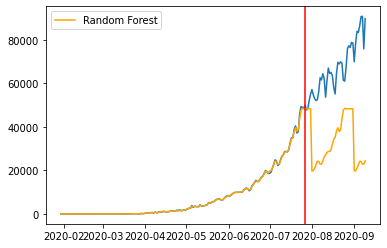

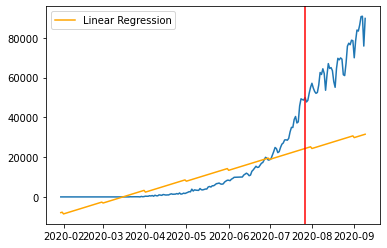

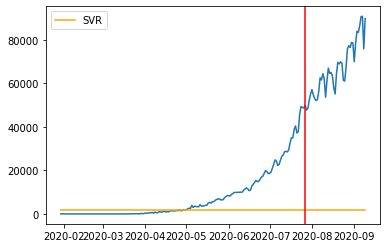

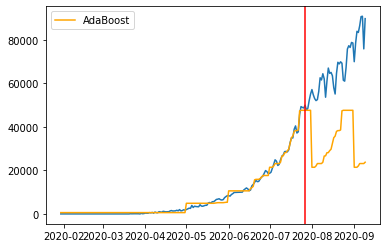

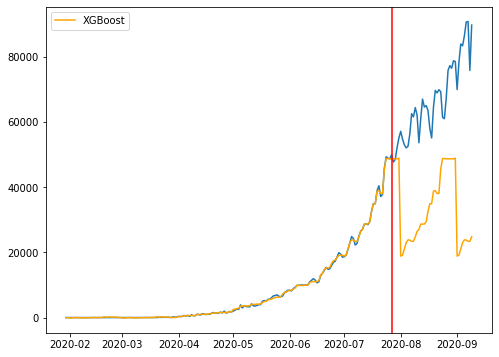

In [ ]:
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
fig, ax4 = plt.subplots()
fig, ax5 = plt.subplots(figsize=(8, 6))

ax1.plot(df_tmp.date, df_tmp.new_cases);
ax2.plot(df_tmp.date, df_tmp.new_cases);
ax3.plot(df_tmp.date, df_tmp.new_cases);
ax4.plot(df_tmp.date, df_tmp.new_cases);
ax5.plot(df_tmp.date, df_tmp.new_cases);

ax1.plot(x.date, model.predict(X),label='Random Forest',color='orange');

ax2.plot(x.date, model2.predict(X),label='Linear Regression',color='orange');

ax3.plot(x.date, model3.predict(X),label='SVR',color='orange');

ax4.plot(x.date, model4.predict(X),label='AdaBoost',color='orange');

ax5.plot(x.date, model5.predict(X),label='XGBoost',color='orange');

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

ax1.axvline(np.datetime64("2020-07-27"),color='r')
ax2.axvline(np.datetime64("2020-07-27"),color='r')
ax3.axvline(np.datetime64("2020-07-27"),color='r')
ax4.axvline(np.datetime64("2020-07-27"),color='r')
ax5.axvline(np.datetime64("2020-07-27"),color='r');
